In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
hehe = pd.read_csv('Transjakarta.csv')

In [20]:
hehe['periode_data'] = pd.to_datetime(hehe['periode_data'], format='%Y%m')

In [21]:
hehe['bulan'] = hehe['periode_data'].dt.strftime('%B')
hehe['tahun'] = hehe['periode_data'].dt.year

<ipython-input-22-acf6820c8ea3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bulan', y='jumlah_penumpang', data=hehe, palette='coolwarm')


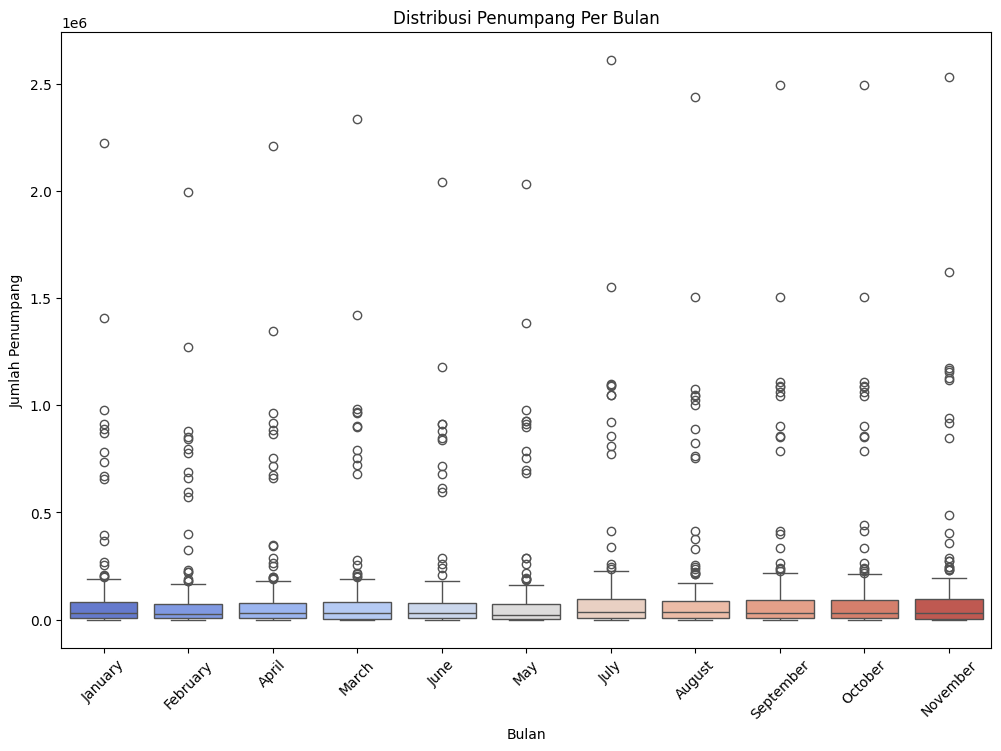

In [22]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='bulan', y='jumlah_penumpang', data=hehe, palette='coolwarm')
plt.title('Distribusi Penumpang Per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penumpang')
plt.xticks(rotation=45)
plt.show()

In [23]:
average_passengers_per_route = hehe.groupby(['kode_trayek', 'bulan'])['jumlah_penumpang'].mean().reset_index()
top_10_routes_avg = average_passengers_per_route.groupby('kode_trayek')['jumlah_penumpang'].mean().reset_index().sort_values(by='jumlah_penumpang', ascending=False).head(10)

<ipython-input-24-1b58f61f0830>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='kode_trayek', y='jumlah_penumpang', data=top_10_routes_avg, palette='viridis')


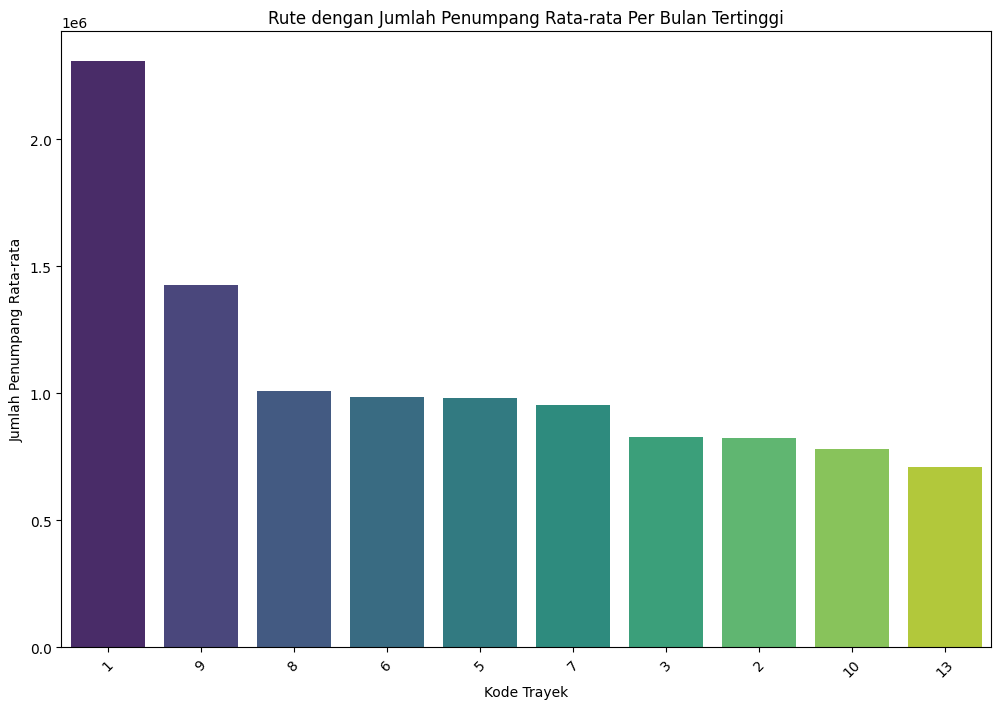

In [24]:
plt.figure(figsize=(12, 8))
sns.barplot(x='kode_trayek', y='jumlah_penumpang', data=top_10_routes_avg, palette='viridis')
plt.title('Rute dengan Jumlah Penumpang Rata-rata Per Bulan Tertinggi')
plt.xlabel('Kode Trayek')
plt.ylabel('Jumlah Penumpang Rata-rata')
plt.xticks(rotation=45)
plt.show()

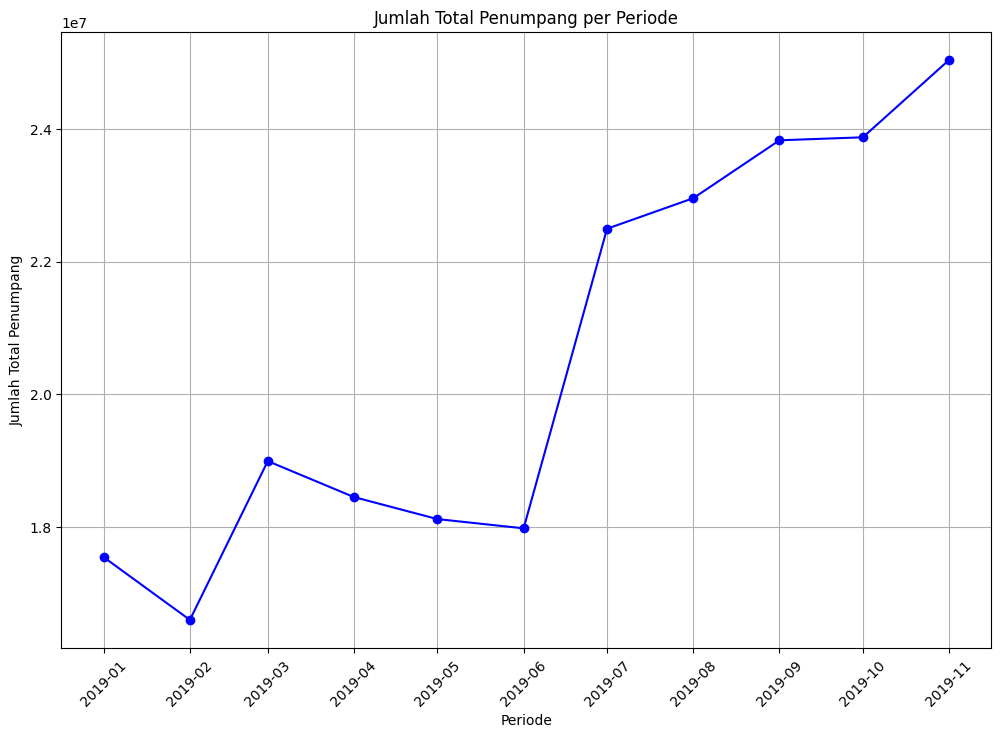

In [25]:
period_passengers = hehe.groupby('periode_data')['jumlah_penumpang'].sum().reset_index()

plt.figure(figsize=(12, 8))
plt.plot(period_passengers['periode_data'], period_passengers['jumlah_penumpang'], marker='o', linestyle='-', color='b')
plt.xlabel('Periode')
plt.ylabel('Jumlah Total Penumpang')
plt.title('Jumlah Total Penumpang per Periode')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

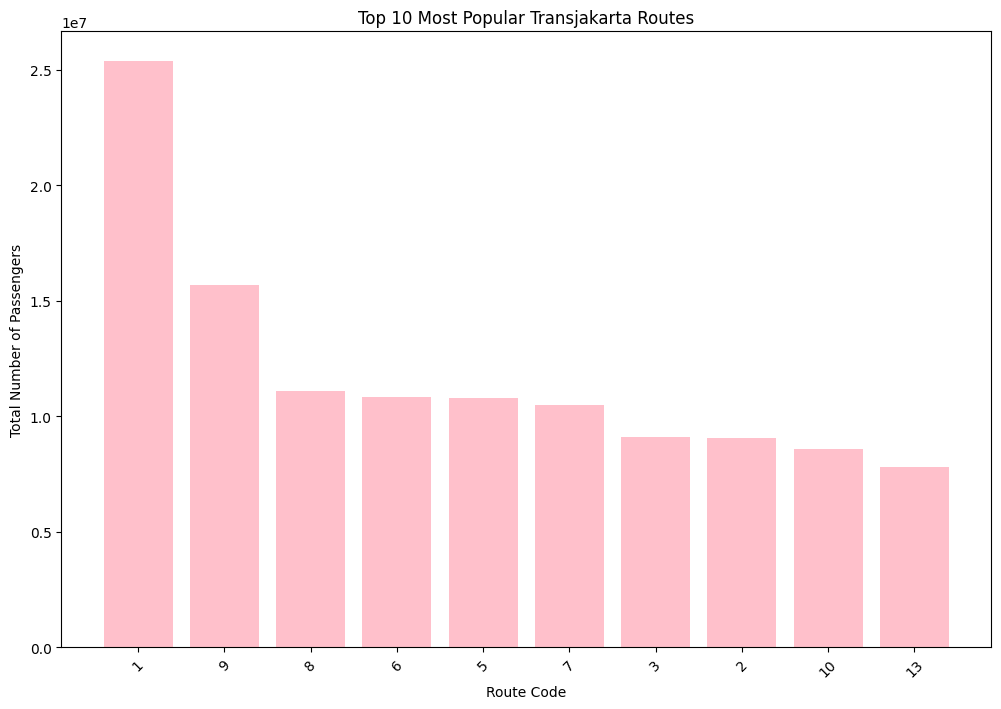

In [26]:
route_popularity = hehe.groupby('kode_trayek')['jumlah_penumpang'].sum().reset_index()
route_popularity = route_popularity.sort_values(by='jumlah_penumpang', ascending=False)

top_10_routes = route_popularity.head(10)

plt.figure(figsize=(12, 8))
plt.bar(top_10_routes['kode_trayek'], top_10_routes['jumlah_penumpang'], color='pink')
plt.xlabel('Route Code')
plt.ylabel('Total Number of Passengers')
plt.title('Top 10 Most Popular Transjakarta Routes')
plt.xticks(rotation=45)
plt.show()

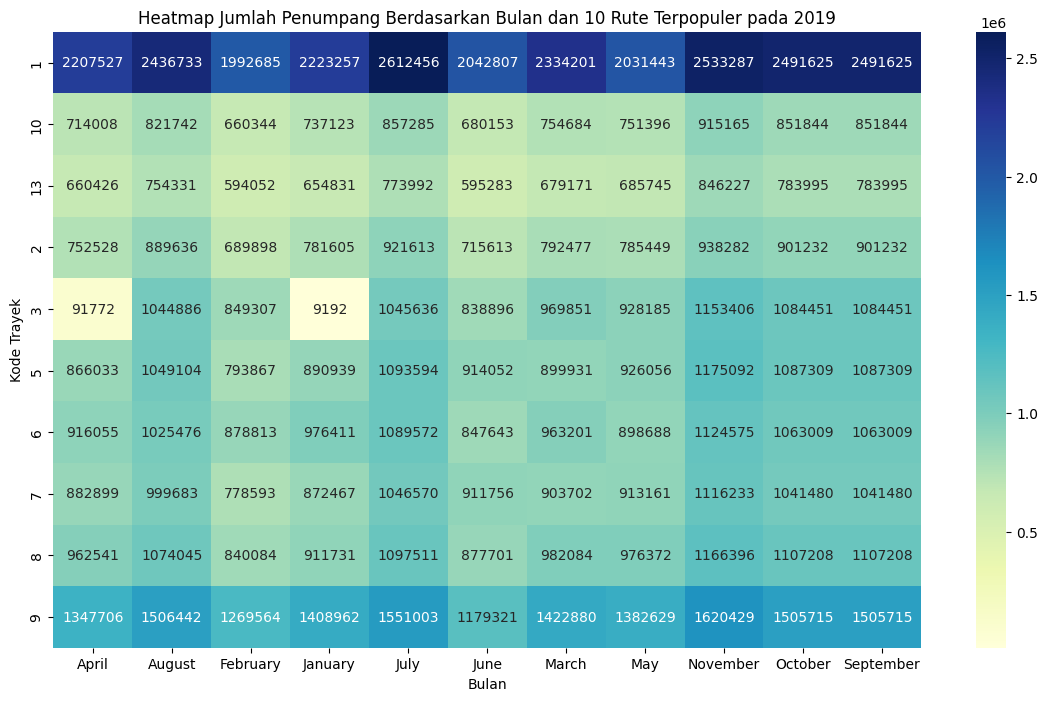

In [27]:
top_10_route_codes = top_10_routes['kode_trayek']
filtered_data = hehe[hehe['kode_trayek'].isin(top_10_route_codes)]

pivot_data = filtered_data.pivot_table(values='jumlah_penumpang', index='kode_trayek', columns='bulan', aggfunc='sum')

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_data, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Heatmap Jumlah Penumpang Berdasarkan Bulan dan 10 Rute Terpopuler pada 2019')
plt.xlabel('Bulan')
plt.ylabel('Kode Trayek')
plt.show()

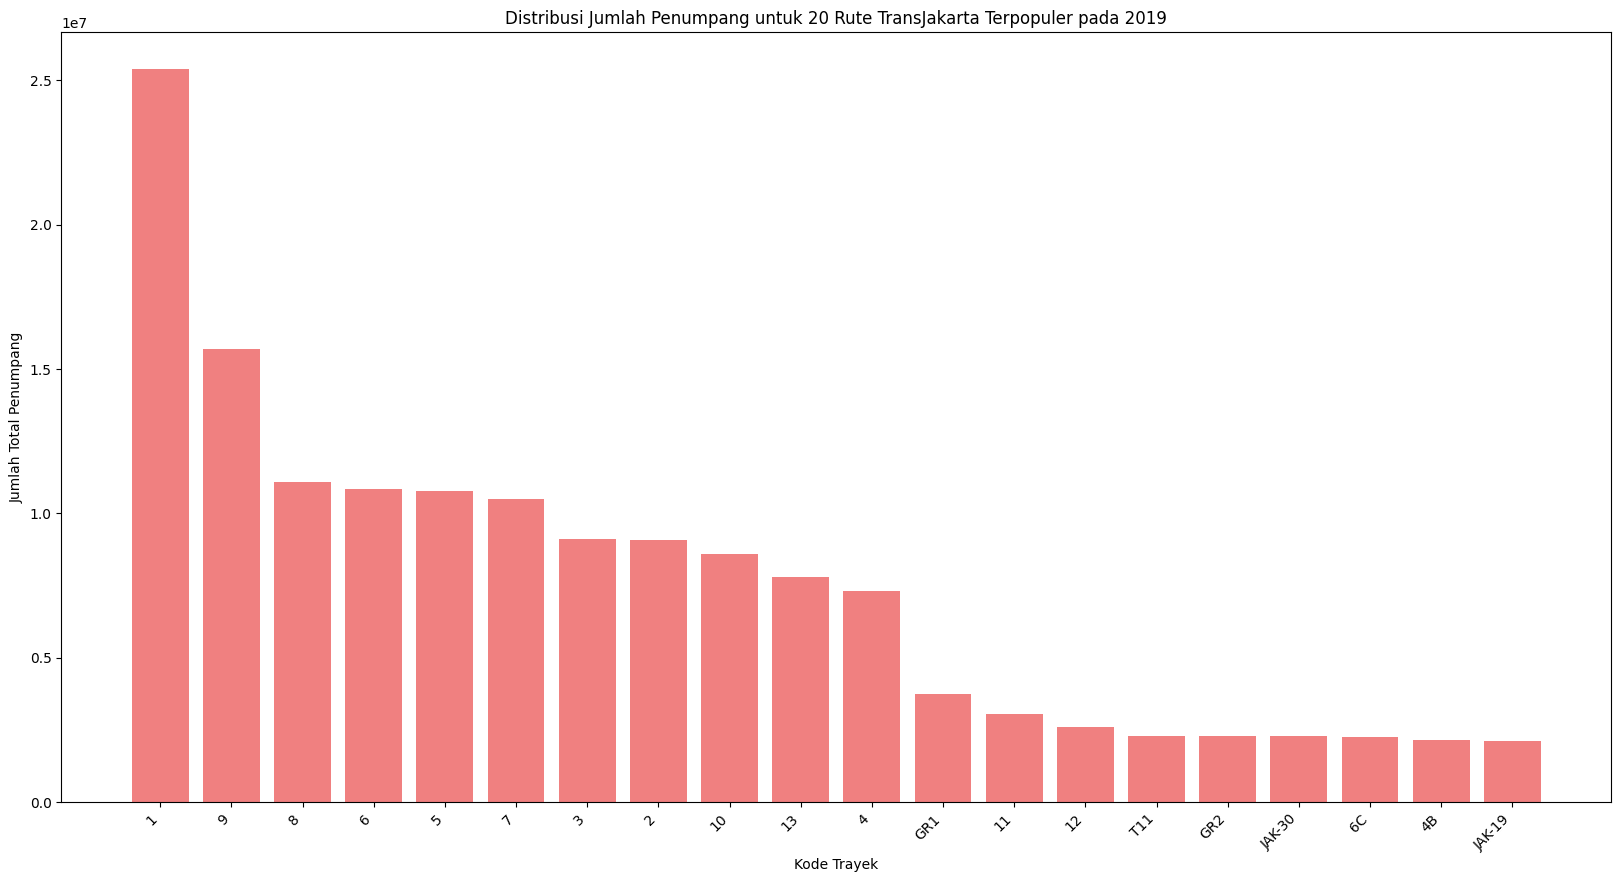

In [28]:
top_20_routes = route_popularity.head(20)

plt.figure(figsize=(20, 10))
plt.bar(top_20_routes['kode_trayek'], top_20_routes['jumlah_penumpang'], color='lightcoral')
plt.xlabel('Kode Trayek')
plt.ylabel('Jumlah Total Penumpang')
plt.title('Distribusi Jumlah Penumpang untuk 20 Rute TransJakarta Terpopuler pada 2019')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

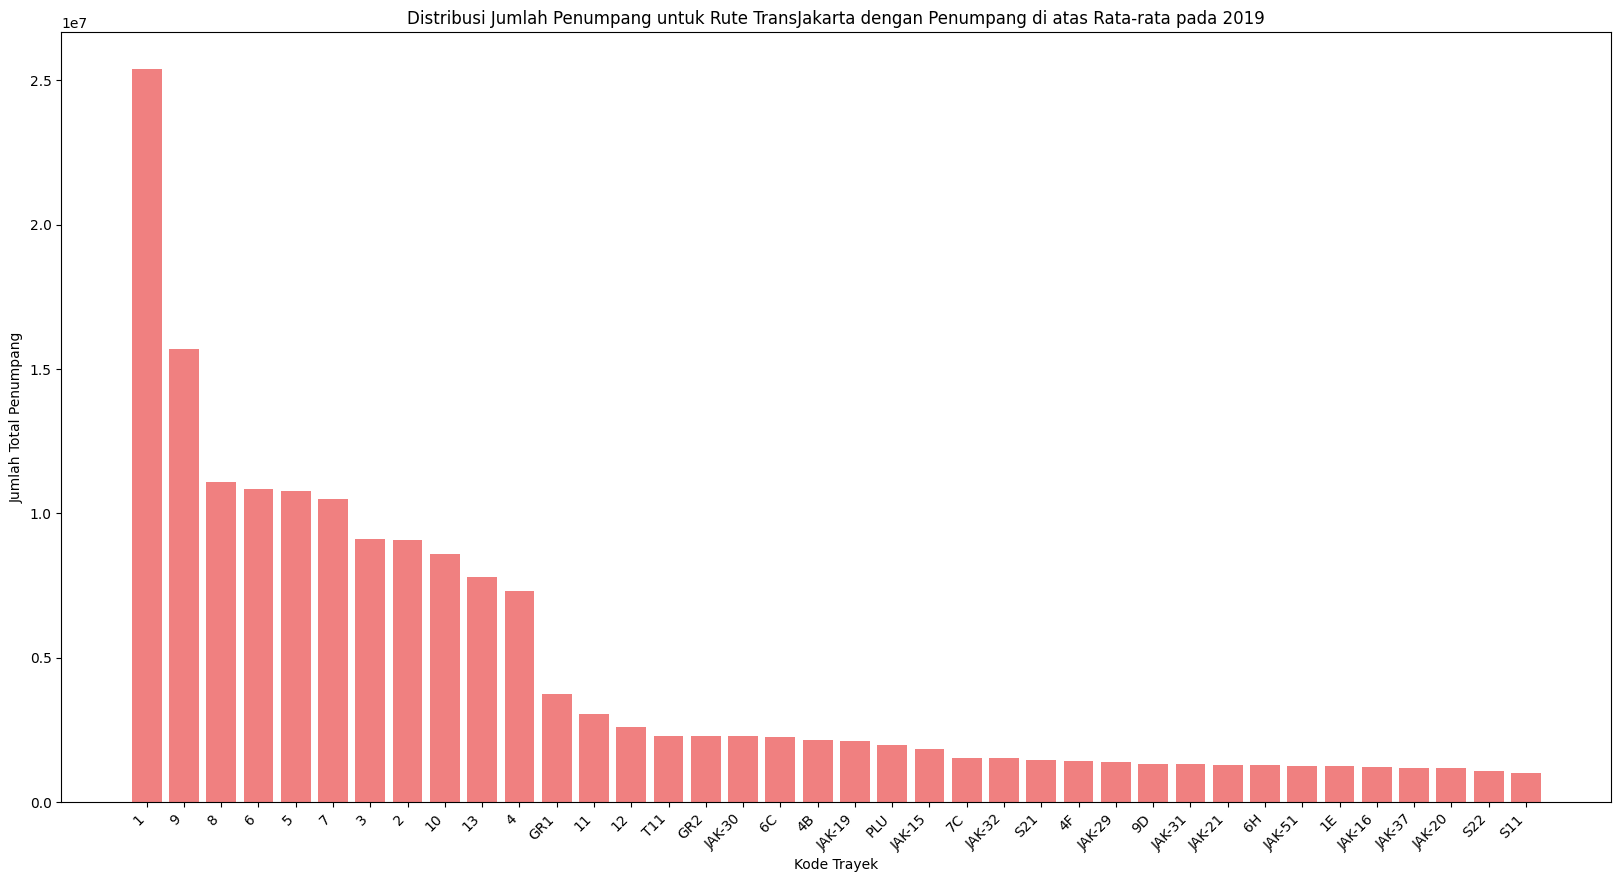

In [29]:
average_passengers = route_popularity['jumlah_penumpang'].mean()
above_average_routes = route_popularity[route_popularity['jumlah_penumpang'] > average_passengers]

plt.figure(figsize=(20, 10))
plt.bar(above_average_routes['kode_trayek'], above_average_routes['jumlah_penumpang'], color='lightcoral')
plt.xlabel('Kode Trayek')
plt.ylabel('Jumlah Total Penumpang')
plt.title('Distribusi Jumlah Penumpang untuk Rute TransJakarta dengan Penumpang di atas Rata-rata pada 2019')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

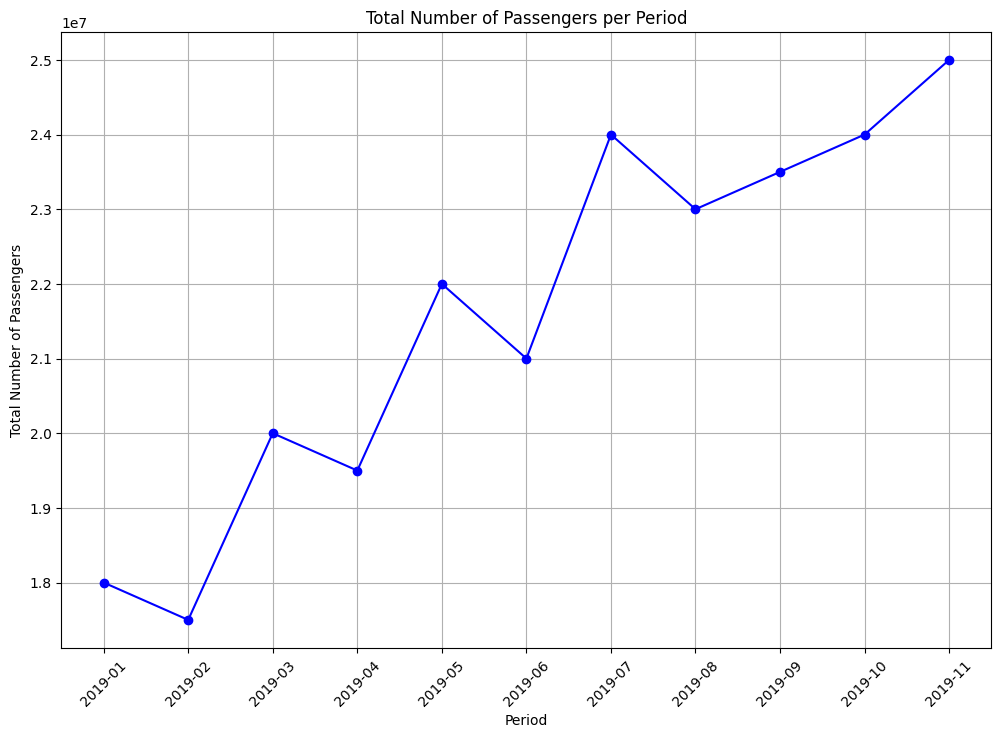

In [30]:
import matplotlib.pyplot as plt

periods = ['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11']
passenger_numbers = [1.8e7, 1.75e7, 2.0e7, 1.95e7, 2.2e7, 2.1e7, 2.4e7, 2.3e7, 2.35e7, 2.4e7, 2.5e7]

plt.figure(figsize=(12, 8))
plt.plot(periods, passenger_numbers, marker='o', linestyle='-', color='b')
plt.xlabel('Period')
plt.ylabel('Total Number of Passengers')
plt.title('Total Number of Passengers per Period')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

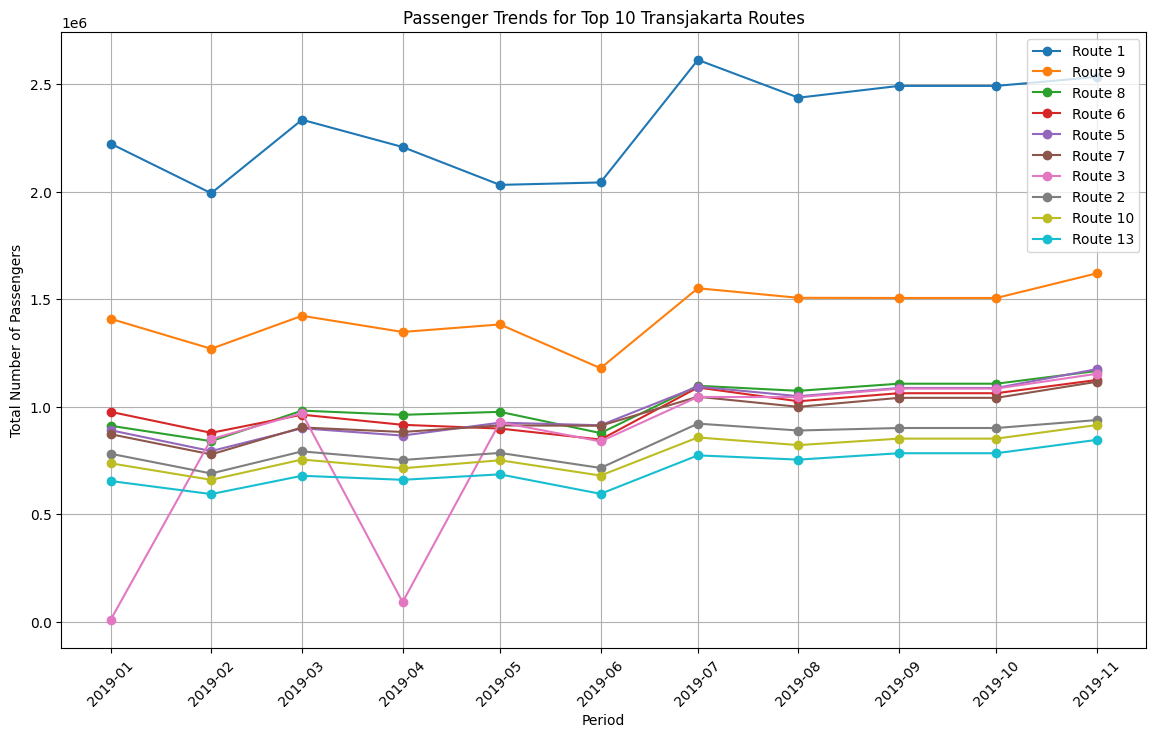

In [31]:
top_routes = hehe.groupby('kode_trayek')['jumlah_penumpang'].sum().nlargest(10).index

top_routes_data = hehe[hehe['kode_trayek'].isin(top_routes)]

grouped_data = top_routes_data.groupby(['kode_trayek', 'periode_data'])['jumlah_penumpang'].sum().reset_index()

plt.figure(figsize=(14, 8))

for route in top_routes:
    route_data = grouped_data[grouped_data['kode_trayek'] == route]
    plt.plot(route_data['periode_data'], route_data['jumlah_penumpang'], marker='o', linestyle='-', label=f'Route {route}')

plt.xlabel('Period')
plt.ylabel('Total Number of Passengers')
plt.title('Passenger Trends for Top 10 Transjakarta Routes')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()